## Step 3 - Climate Analysis and Exploration

### Reflect Database Tables

In [1]:
# Import dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [4]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [6]:
# Assign classes to a variable
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create a session
session = Session(engine)

### Precipitation Analysis

In [8]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import datetime as dt

<IPython.core.display.Javascript object>


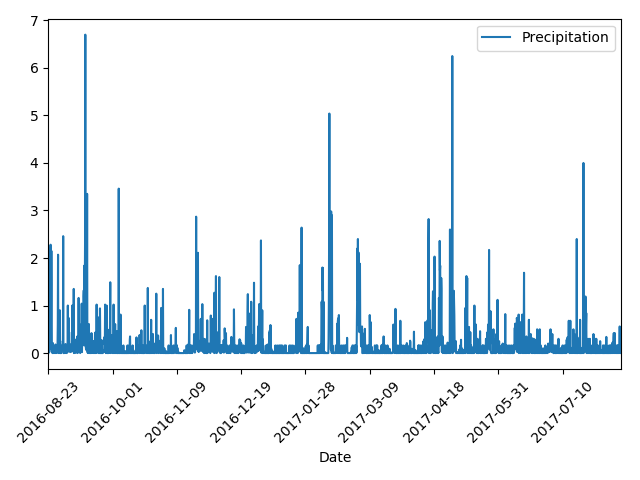

In [9]:
# Design a query to retrieve the last 12 months of precipitation data.
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Select only the date and prcp values.
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).order_by(Measurement.date).all()
# Load the query results into a Pandas DataFrame and set the index to the date column.
results_df = pd.DataFrame(results)
results_df.set_index('date')
# Plot the results using the DataFrame plot method.
results_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.legend(["Precipitation"])
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [10]:
# Use Pandas to print the summary statistics for the precipitation data.
results_df.describe()

,prcp
count,2230.000000
mean,0.175720
std,0.439063
min,0.000000
25%,0.000000
50%,0.030000
75%,0.160644
max,6.700000


### Station Analysis

In [11]:
# Design a query to calculate the total number of stations.
stations = session.query(Measurement).group_by(Measurement.station).count()
stations

9

In [12]:
# Design a query to find the most active stations. 
# Which station has the highest number of observations?
# List the stations and observation counts in descending order
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

<IPython.core.display.Javascript object>


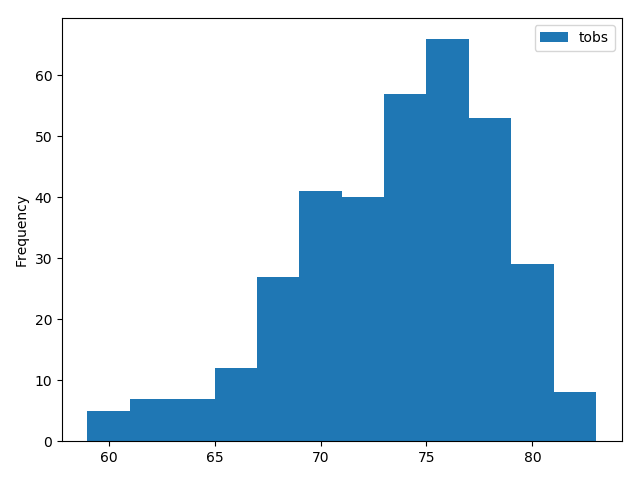

In [13]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.
temp_observation = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= last_year).\
    order_by(Measurement.date).all()
temp_df = pd.DataFrame(temp_observation, columns=['tobs'])
#temp_df
# Plot the results as a histogram with bins=12.
temp_df.plot.hist(bins=12)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Temperature Analysis

In [14]:
# Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, 
# average, and maximum temperatures for that range of dates.
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(calc_temps('2017-03-04', '2017-03-11'))

[(62.0, 70.48936170212765, 82.0)]


In [15]:
# Use the calc_temps function to calculate the min, avg, and max temperatures for your trip 
# using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")
prev_year_start = dt.date(2017, 3, 4) - dt.timedelta(days=365)
prev_year_end = dt.date(2017, 3, 11) - dt.timedelta(days=365)
# last_year_temp = (calc_temps(prev_year_start, prev_year_end))
# print(last_year_temp)
tmin, tavg, tmax = calc_temps(prev_year_start.strftime("%Y-%m-%d"), prev_year_end.strftime("%Y-%m-%d"))[0]
print(tmin, tavg, tmax)

62.0 70.25 78.0


<IPython.core.display.Javascript object>


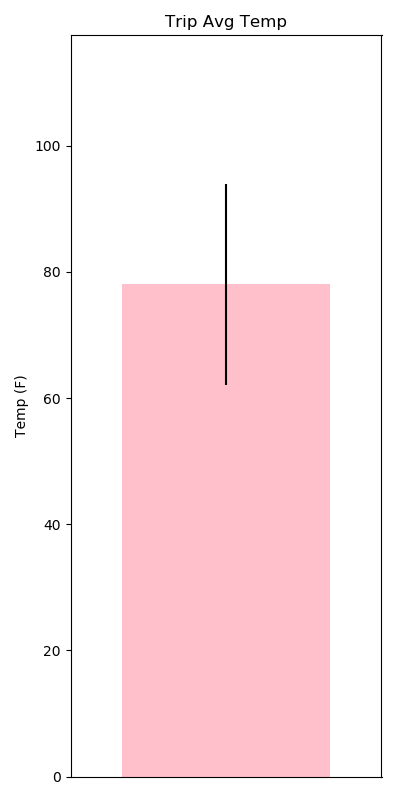

In [29]:
# Plot the min, avg, and max temperature from your previous query as a bar chart.
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
error = (tmax-tmin)
bar = ax.bar(xpos, tmax, yerr=error, color='pink', align='center')
ax.set(xticks=range(xpos), title="Trip Avg Temp", ylabel="Temp (F)") 
#fig.suptitle=("Trip Avg Temp")
#plt.ylabel=("Temp (F)")
ax.margins(.25,.25)
fig.tight_layout()
fig.show()